## Instal Dataset

In [1]:
! gdown --id 1Q_-lGZUO2Xkao3APiXpClak6V-XQ0MqP

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1Q_-lGZUO2Xkao3APiXpClak6V-XQ0MqP
From (redirected): https://drive.google.com/uc?id=1Q_-lGZUO2Xkao3APiXpClak6V-XQ0MqP&confirm=t&uuid=b3bbfcf5-7076-40a9-9c43-9dbb51078866
To: /content/dataset_CulturLens.zip
100% 2.47G/2.47G [00:32<00:00, 77.2MB/s]


Extrac Dataset

In [2]:
import zipfile

local_zip = '/content/dataset_CulturLens.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

## Import Libary and requirement

In [3]:
import io
import numpy as np
import os
import tensorflow_hub as hub
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from PIL import Image
from google.colab import files

## Preparation Data

In [4]:
dataset_path = '/content/dataset_CulturLens'

In [5]:
import os

penjor_dir = os.path.join(dataset_path, 'Penjor')
Canang_dir = os.path.join(dataset_path, 'Canang')
Pelinggih_dir = os.path.join(dataset_path, 'Pelinggih')
Pelangkiran_dir = os.path.join(dataset_path, 'Pelangkiran')
Gebogan_dir = os.path.join(dataset_path, 'Gebogan')
BantenSaiban_dir = os.path.join(dataset_path, 'banten_saiban')
kain_Poleng_dir = os.path.join(dataset_path, 'kain poleng')

In [6]:
print(f'total penjor images: {len(os.listdir(penjor_dir))}')
print(f'total Canang images: {len(os.listdir(Canang_dir))}')
print(f'total Pelinggih images: {len(os.listdir(Pelinggih_dir))}')
print(f'total Pelangkiran images: {len(os.listdir(Pelangkiran_dir))}')
print(f'total Gebogan images: {len(os.listdir(Gebogan_dir))}')
print(f'total BantenSaiban images: {len(os.listdir(BantenSaiban_dir))}')
print(f'total Kain Poleng images: {len(os.listdir(kain_Poleng_dir))}')

total penjor images: 209
total Canang images: 204
total Pelinggih images: 200
total Pelangkiran images: 229
total Gebogan images: 211
total BantenSaiban images: 207
total Kain Poleng images: 201


## Augmentasi Data

In [13]:
image_size = (224, 224)
batch_size = 64

datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 1024 images belonging to 7 classes.
Found 435 images belonging to 7 classes.


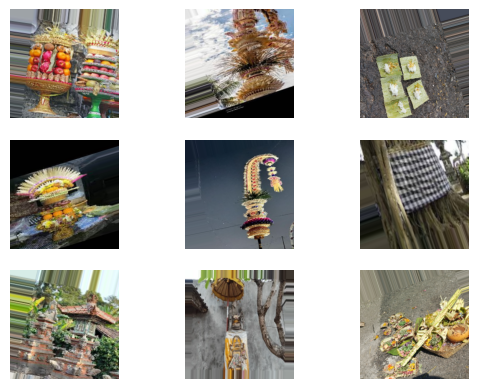

In [14]:
images, labels = next(train_generator)

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()

## Create A Model with MobilNetV2

In [37]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [38]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,422,855 (9.24 MB)

 Trainable params: 164,871 (644.03 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

## Traning Data

In [39]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    verbose=1
    )


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 183s 9s/step - accuracy: 0.5369 - loss: 1.2912 - val_accuracy: 0.9264 - val_loss: 0.2185
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 155s 8s/step - accuracy: 0.9145 - loss: 0.2300 - val_accuracy: 0.9540 - val_loss: 0.1439
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 155s 8s/step - accuracy: 0.9659 - loss: 0.1008 - val_accuracy: 0.9402 - val_loss: 0.1647
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 241s 10s/step - accuracy: 0.9738 - loss: 0.0718 - val_accuracy: 0.9517 - val_loss: 0.1201
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 162s 8s/step - accuracy: 0.9832 - loss: 0.0541 - val_accuracy: 0.9494 - val_loss: 0.1414
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 194s 8s/step - accuracy: 0.9857 - loss: 0.0553 - val_accuracy: 0.9632 - val_loss: 0.1141
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 216s 9s/step - accuracy: 0.9861 - loss: 0.0514 - val_accuracy: 0.9632 - val_loss: 0.0944
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 157s 8s/step - accuracy: 0.9949 - loss: 0.0312 - val_accuracy: 0.9701 - 

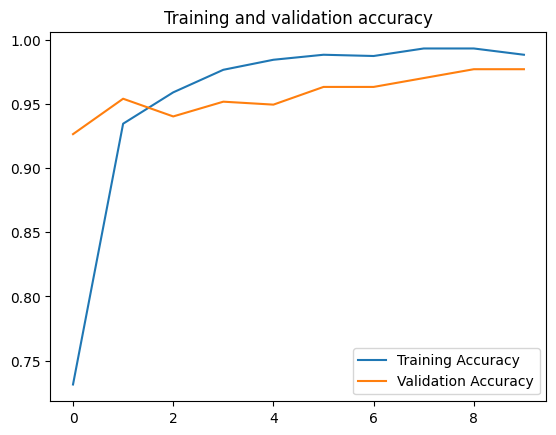

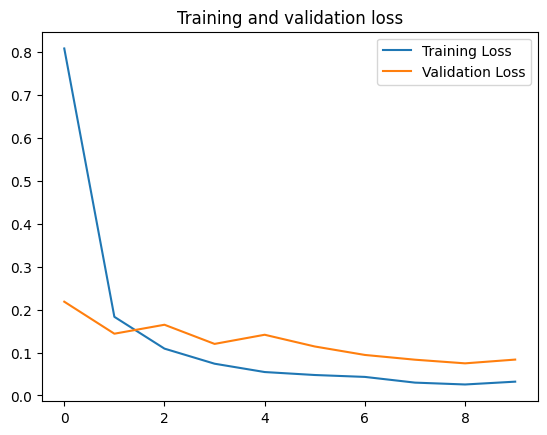

In [40]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

## Save Model

In [41]:
os.makedirs("/content/Saved_model", exist_ok=True)

In [42]:
model.save("/content/Saved_model/model.h5")

In [43]:
# Saved Model Format Json
model_json = model.to_json()
with open("/content/Saved_model/model.json", "w") as json_file:
    json_file.write(model_json)
# Changed the filename to include .weights before .h5
model.save_weights("/content/Saved_model/model_weights.weights.h5")

model.save("/content/Saved_model/saved_model_file.keras")



In [52]:
!zip -r /content/Saved_model.zip /content/Saved_model

updating: content/Saved_model/ (stored 0%)
updating: content/Saved_model/model.h5 (deflated 11%)
updating: content/Saved_model/model.json (deflated 97%)
updating: content/Saved_model/saved_model_file.keras (deflated 11%)
updating: content/Saved_model/model_weights.weights.h5 (deflated 10%)
  adding: content/Saved_model/model_CulturLens.tflite (deflated 7%)


In [54]:
from google.colab import files
files.download("/content/Saved_model.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Create Label For Tf.lite

In [44]:
labels = [
    "Canang",
    "Gebogan",
    "Pelangkiran",
    "Pelinggih",
    "Penjor",
    "Banten Saiban",
    "Kain Poleng"
]

with open("labels.txt", "w") as file:
    for label in labels:
        file.write(label + "\n")

print("File labels.txt Succsesfull!")


File labels.txt Succsesfull!


## Convert to TF.lite

instal tflite support

In [23]:
pip install tflite-support

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 14.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.62.3 requires protobuf>=4.21.6, but you have protobuf 3.20.3 which is incompatible.


In [45]:
h5_model_path = "/content/Saved_model/model.h5"
model = tf.keras.models.load_model(h5_model_path)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

tflite_model_path = "model.tflite"
with open(tflite_model_path, "wb") as f:
    f.write(tflite_model)

print("Model Succsesfull convert to:", tflite_model_path)

Saved artifact at '/tmp/tmp3bp93cia'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_2')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  135248385892144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135248385821856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135248385823968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135248385899008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135248385819568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135248385827488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135248385827840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135248385829248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135248385825552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135248385827136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1352483858315

## Put a Metadata for Tf.lite

In [27]:
!pip install --upgrade protobuf==3.20.3

In [51]:
from tflite_support.metadata_writers import image_classifier
from tflite_support.metadata_writers import writer_utils

# Path file TFLite Anda
model_path = "/content/model.tflite"
output_model_path = "/content/Saved_model/model_CulturLens.tflite"

# Detail metadata
input_mean = [127.5, 127.5, 127.5]
input_std = [127.5, 127.5, 127.5]
label_file = "labels.txt"


writer = image_classifier.MetadataWriter.create_for_inference(
    writer_utils.load_file(model_path),
    input_mean,
    input_std,
    label_file_paths=[label_file]
)

metadata_model = writer.populate()
writer_utils.save_file(metadata_model, output_model_path)

print("Metadata berhasil ditambahkan ke model:", output_model_path)


Metadata berhasil ditambahkan ke model: /content/Saved_model/model_CulturLens.tflite


## Testing A Model h5

In [47]:
def preprocess_image(image_path, target_size):

    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

In [48]:
custom_objects = {'KerasLayer': hub.KerasLayer}

model = tf.keras.models.load_model('/content/Saved_model/model.h5', custom_objects=custom_objects)

class_indices = {
    0: 'Canang',
    1: 'Gebogan',
    2: 'Pelangkiran',
    3: 'Pelinggih',
    4: 'Penjor',
    5: 'Banten Saiban',
    6: 'kain poleng'
}

Saving harusnuya p[enjor.png to harusnuya p[enjor (1).png
File diunggah: harusnuya p[enjor (1).png


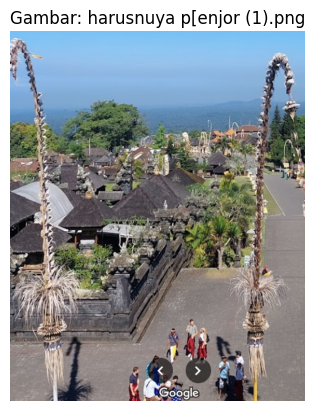

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
The uploaded image is predicted as: 99.00% Penjor


In [49]:
uploaded = files.upload()

for file_name in uploaded.keys():
    print(f"File diunggah: {file_name}")
    image_path = file_name

    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Gambar: {file_name}")
    plt.show()

    image = preprocess_image(image_path, target_size=(224, 224))
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions[0])
    predicted_probability = predictions[0][predicted_class] * 100
    predicted_label = class_indices[predicted_class]

    print(f"The uploaded image is predicted as: {predicted_probability:.2f}% {predicted_label}")